In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['car data.csv']))
df.replace(to_replace =["Petrol","Diesel","CNG","Manual","Automatic"]
                 ,value =[1,2,3,1,2])

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,1,Dealer,1,0,6
1,sx4,2013,4.75,9.54,43000,2,Dealer,1,0,7
2,ciaz,2017,7.25,9.85,6900,1,Dealer,1,0,3
3,wagon r,2011,2.85,4.15,5200,1,Dealer,1,0,9
4,swift,2014,4.60,6.87,42450,2,Dealer,1,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,Dealer,1,0,4
297,brio,2015,4.00,5.90,60000,1,Dealer,1,0,5
298,city,2009,3.35,11.00,87934,1,Dealer,1,0,11
299,city,2017,11.50,12.50,9000,2,Dealer,1,0,3


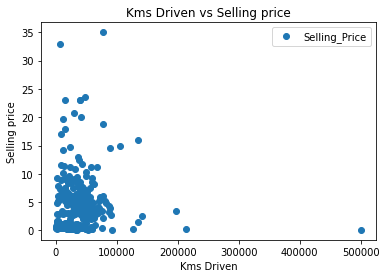

In [ ]:
df.plot(x='Kms_Driven',y='Selling_Price', style='o')
plt.title('Kms Driven vs Selling price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling price')
plt.show()

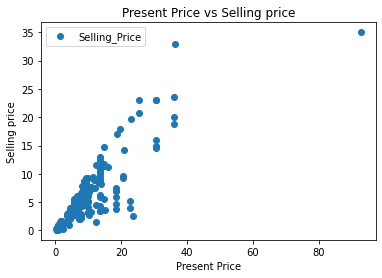

In [ ]:
df.plot(x='Present_Price',y='Selling_Price', style='o')
plt.title('Present Price vs Selling price')
plt.xlabel('Present Price')
plt.ylabel('Selling price')
plt.show()

In [ ]:
from sklearn import linear_model

In [ ]:
dk=df.replace(to_replace =["Petrol","Diesel","CNG","Manual","Automatic"]
                 ,value =[1,2,3,1,2])
dk.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,1,Dealer,1,0,6
1,sx4,2013,4.75,9.54,43000,2,Dealer,1,0,7
2,ciaz,2017,7.25,9.85,6900,1,Dealer,1,0,3
3,wagon r,2011,2.85,4.15,5200,1,Dealer,1,0,9
4,swift,2014,4.60,6.87,42450,2,Dealer,1,0,6


In [ ]:
X=dk[['Kms_Driven','Present_Price','Age','Fuel_Type','Transmission']]
y=dk['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

In [ ]:
regressor= linear_model.LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict=regressor.predict(X_test)

In [ ]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df2.head(10)

,Actual,Predicted
223,8.25,7.047629
150,0.50,-0.030005
226,5.25,3.833648
296,9.50,8.631717
52,18.00,14.020294
261,5.50,4.478575
246,3.75,3.019003
166,0.45,1.982294
221,4.50,4.528977
215,4.50,4.226718


In [ ]:
Predicted_Price = regressor.predict([[40000,8,7,1,1]])
print("Price in Lakhs")
print(Predicted_Price)

Price in Lakhs
[3.9792959]


In [ ]:
from sklearn import metrics
print('Accuracy of the model:',metrics.r2_score(y_test,y_predict))

Accuracy of the model: 0.9113066381462803
